In [ ]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
# Import our dependencies (libraries)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from pathlib import Path
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd 
import plotly.express as px
import seaborn as sns 
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.feature_selection import RFE
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import classification_report


In [ ]:
#  Import and read the csv file
import pandas as pd 
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**DATA EXPLORATION**

In [ ]:
# To check the data data-types & number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
#Dsiplaying the shape of original data 
#dataset has 4238 rows and 16 columns
df.shape

(4238, 16)

In [ ]:
# Determine the number of unique values in each column
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [ ]:
# statistical summaries for the dataset
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#Check for null valumes on each column
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
# Data Types
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

**DATA CLEANING**

*Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete/null-value data within a dataset or unnecessary columns irrelavant for the analysis .* 

In [ ]:
# Dropped 'Education' column as it is not related 
df.drop(["education"],axis=1,inplace = True)
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#To check for duplicate values
df.duplicated().sum()

0

In [ ]:
df["glucose"].fillna((df["glucose"].mode())[0], inplace=True)

In [ ]:
# To replce the null values with the column mean values, to have a wide dataset
df.dropna(inplace=True)
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# To check the data data-types & number of rows (No null values now)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4088 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4088 non-null   int64  
 1   age              4088 non-null   int64  
 2   currentSmoker    4088 non-null   int64  
 3   cigsPerDay       4088 non-null   float64
 4   BPMeds           4088 non-null   float64
 5   prevalentStroke  4088 non-null   int64  
 6   prevalentHyp     4088 non-null   int64  
 7   diabetes         4088 non-null   int64  
 8   totChol          4088 non-null   float64
 9   sysBP            4088 non-null   float64
 10  diaBP            4088 non-null   float64
 11  BMI              4088 non-null   float64
 12  heartRate        4088 non-null   float64
 13  glucose          4088 non-null   float64
 14  TenYearCHD       4088 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 511.0 KB


In [ ]:
std_corr = df.corr()
print(std_corr['TenYearCHD'].sort_values(ascending = False))

TenYearCHD         1.000000
age                0.226849
sysBP              0.214921
prevalentHyp       0.173806
diaBP              0.147684
glucose            0.121816
male               0.096060
diabetes           0.089132
BPMeds             0.085618
totChol            0.080676
BMI                0.076643
cigsPerDay         0.063060
prevalentStroke    0.044186
heartRate          0.025715
currentSmoker      0.025360
Name: TenYearCHD, dtype: float64


In [ ]:
# Identify the features with the most importance for the outcome variable Heart Disease
#Apply SelectKBest and extract top 10 features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = df.iloc[:,0:14]  
y = df.iloc[:,-1]    

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(11,'Score'))

           Specs       Score
9          sysBP  685.163950
13       glucose  393.000228
1            age  309.950260
3     cigsPerDay  256.404641
8        totChol  222.226347
10         diaBP  150.756040
6   prevalentHyp   85.309220
7       diabetes   31.650650
4         BPMeds   29.087085
0           male   21.324869
11           BMI   15.474582


In [ ]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
9,sysBP,685.163950
13,glucose,393.000228
1,age,309.950260
3,cigsPerDay,256.404641
8,totChol,222.226347
10,diaBP,150.756040
6,prevalentHyp,85.309220
7,diabetes,31.650650
4,BPMeds,29.087085
0,male,21.324869


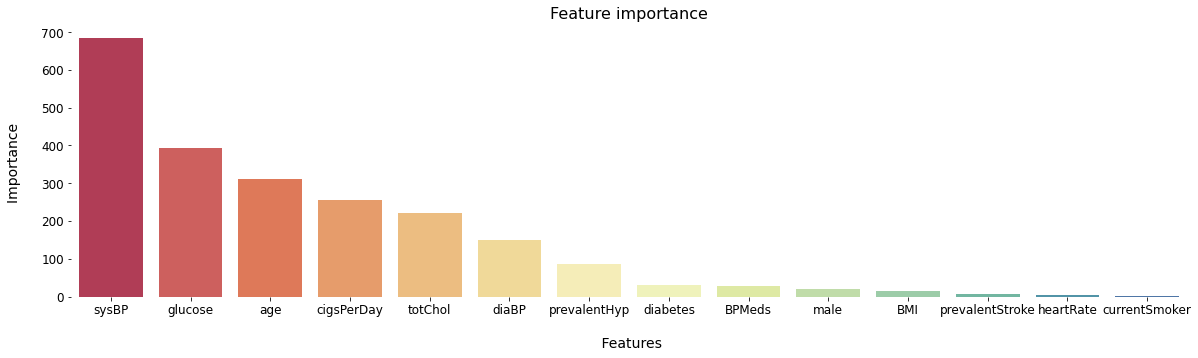

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "Spectral")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

sysBP , Glucose ,Age are the first three important features in the data 

In [ ]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'cigsPerDay',
 'totChol',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

These features which have strongest relationship with the output variable 

In [ ]:
# New dataframe with selected features

df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0
5,180.0,99.0,43,228.0,0.0,110.0,1,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2206,181.5,97.0,46,405.0,15.0,102.5,1,0,0.0,1,1
3445,146.0,83.0,58,271.0,2.0,92.0,0,0,0.0,0,1
2238,145.0,98.0,54,288.0,43.0,92.5,0,0,0.0,1,1
3574,121.0,78.0,49,184.0,0.0,82.0,1,0,1.0,0,1


In [ ]:
#Taining and Testing the Data
from sklearn.model_selection import train_test_split
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis=1)

# divide train test: 70 % - 30 %
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state=30)

print(len(train_x))
print(len(test_x))

4867
2087


In [ ]:
#Normalize the dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
# Resampling
target1=df[df['TenYearCHD']==1]
target0=df[df['TenYearCHD']==0] 

In [ ]:
# To balance the dataset
from sklearn.utils import resample
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)
target=pd.concat([target0,target1])
target['TenYearCHD'].value_counts() 

df=target
np.shape(df)

(6954, 11)

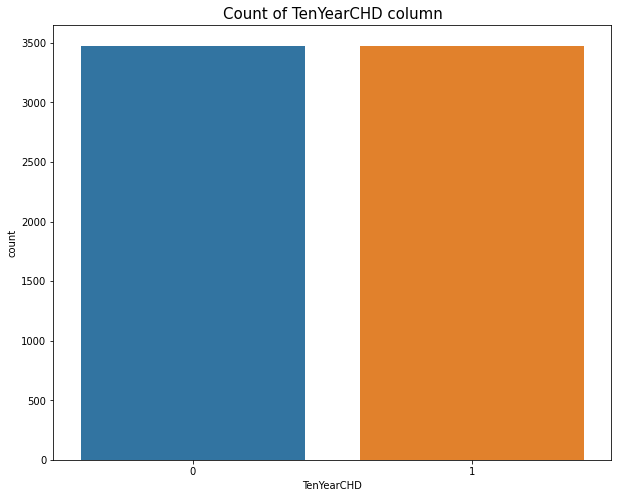

In [ ]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(10, 8), facecolor='w')

sns.countplot(x="TenYearCHD", data=df)
plt.title("Count of TenYearCHD column", size=15)
plt.show()

In [ ]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=df.iloc[:,0:15]
y=df.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (6954, 11) 
y -  (6954,)


In [ ]:
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

**Different Machine Learning Models**

In [ ]:
# LogisticRegression
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confusion matrix
[[709 325]
 [342 711]]


Accuracy of Logistic Regression: 68.04024916147581 

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1034
           1       0.69      0.68      0.68      1053

    accuracy                           0.68      2087
   macro avg       0.68      0.68      0.68      2087
weighted avg       0.68      0.68      0.68      2087



In [ ]:
# DecisionTreeClassifier
m2 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
# dt = DecisionTreeClassifier(criterion = 'gini',max_leaf_nodes= 15,random_state=0)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confusion matrix
[[ 855  179]
 [  12 1041]]


Accuracy of DecisionTreeClassifier: 90.84810733109727 

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      1034
           1       0.85      0.99      0.92      1053

    accuracy                           0.91      2087
   macro avg       0.92      0.91      0.91      2087
weighted avg       0.92      0.91      0.91      2087



[Text(0.4244207331643242, 0.9833333333333333, 'X[2] <= 0.382\nentropy = 1.0\nsamples = 4867\nvalue = [2443, 2424]'),
 Text(0.1616206670550539, 0.95, 'X[4] <= 0.158\nentropy = 0.865\nsamples = 1558\nvalue = [1111, 447]'),
 Text(0.09232085639382465, 0.9166666666666666, 'X[5] <= 0.64\nentropy = 0.683\nsamples = 750\nvalue = [614, 136]'),
 Text(0.06812554616953102, 0.8833333333333333, 'X[5] <= 0.325\nentropy = 0.645\nsamples = 730\nvalue = [610, 120]'),
 Text(0.04886396737547335, 0.85, 'X[0] <= 0.281\nentropy = 0.444\nsamples = 303\nvalue = [275, 28]'),
 Text(0.03946985144188756, 0.8166666666666667, 'X[3] <= 0.247\nentropy = 0.404\nsamples = 298\nvalue = [274, 24]'),
 Text(0.02767258957180309, 0.7833333333333333, 'X[1] <= 0.134\nentropy = 0.338\nsamples = 271\nvalue = [254, 17]'),
 Text(0.015729682493445966, 0.75, 'X[1] <= 0.1\nentropy = 0.217\nsamples = 231\nvalue = [223, 8]'),
 Text(0.013399359161083601, 0.7166666666666667, 'X[0] <= 0.071\nentropy = 0.323\nsamples = 136\nvalue = [128, 8]

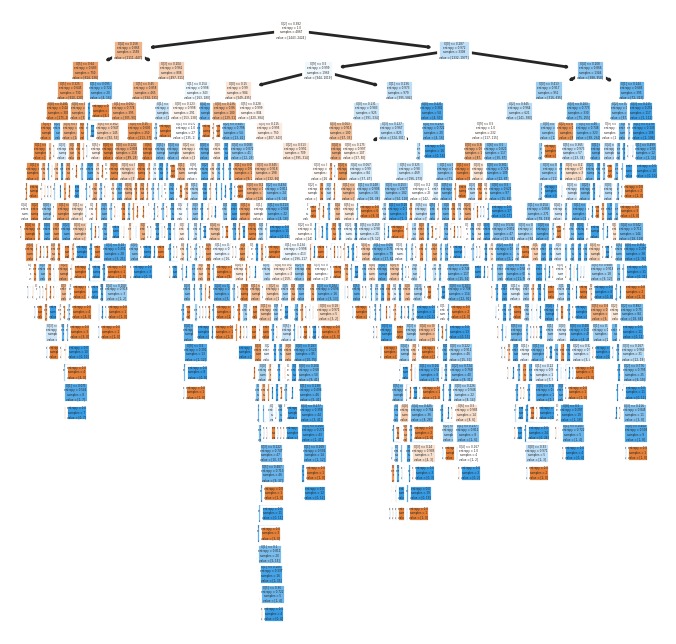

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(dt,filled=True)
     

In [ ]:
# LGBMClassifier
m3 = 'LGBMClassifier'
lg=LGBMClassifier(boosting_type='gbdt',n_estimators=5000,learning_rate=0.05,objective='binary',metric='accuracy',is_unbalance=True,
                 colsample_bytree=0.7,reg_lambda=3,reg_alpha=3,random_state=500,n_jobs=-1,num_leaves=35)
lg.fit(train_x,train_y)
lg_predicted = lg.predict(test_x)
lg_conf_matrix = confusion_matrix(test_y, lg_predicted)
lg_acc_score = accuracy_score(test_y, lg_predicted)
print("confusion matrix")
print(lg_conf_matrix)
print("\n")
print("LGBMClassifier:",lg_acc_score*100,'\n')
print(classification_report(test_y,lg_predicted))

confusion matrix
[[866 168]
 [ 72 981]]


LGBMClassifier: 88.50023957834212 

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1034
           1       0.85      0.93      0.89      1053

    accuracy                           0.89      2087
   macro avg       0.89      0.88      0.88      2087
weighted avg       0.89      0.89      0.88      2087



In [ ]:
# XGBClassifier
m4 = 'XGBClassifier'
xg = XGBClassifier(learning_rate=0.05, n_estimators=100,max_depth=4, subsample = 0.9,colsample_bytree = 0.1, gamma=1,random_state=42)
xg.fit(train_x,train_y)
xg_predicted = xg.predict(test_x)
xg_conf_matrix = confusion_matrix(test_y, xg_predicted)
xg_acc_score = accuracy_score(test_y, xg_predicted)
print("confusion matrix")
print(xg_conf_matrix)
print("\n")
print("XGBClassifier:",xg_acc_score*100,'\n')
print(classification_report(test_y,xg_predicted))

confusion matrix
[[716 318]
 [328 725]]


XGBClassifier: 69.04647819837086 

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1034
           1       0.70      0.69      0.69      1053

    accuracy                           0.69      2087
   macro avg       0.69      0.69      0.69      2087
weighted avg       0.69      0.69      0.69      2087



In [ ]:
# MLPClassifier
m5 = 'MLPClassifier'
mlp=MLPClassifier(solver='adam', learning_rate_init = 0.0005, learning_rate = 'adaptive', activation="relu", max_iter=3000, random_state=10)
mlp.fit(train_x,train_y)
mlp_predicted = mlp.predict(test_x)
mlp_conf_matrix = confusion_matrix(test_y, mlp_predicted)
mlp_acc_score = accuracy_score(test_y, mlp_predicted)
print("confusion matrix")
print(mlp_conf_matrix)
print("\n")
print("MLPClassifier:",mlp_acc_score*100,'\n')
print(classification_report(test_y,mlp_predicted))

confusion matrix
[[733 301]
 [340 713]]


MLPClassifier: 69.28605654048874 

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1034
           1       0.70      0.68      0.69      1053

    accuracy                           0.69      2087
   macro avg       0.69      0.69      0.69      2087
weighted avg       0.69      0.69      0.69      2087



In [ ]:
#ROc Curve to compare all the classifiers

lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(test_y,lr_predict)
                                                      
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(test_y,dt_predicted)
lg_false_positive_rate,lg_true_positive_rate,lg_threshold = roc_curve(test_y,lg_predicted)
xg_false_positive_rate,xg_true_positive_rate,xg_threshold = roc_curve(test_y,xg_predicted)
mlp_false_positive_rate,mlp_true_positive_rate,mlp_threshold = roc_curve(test_y,mlp_predicted)

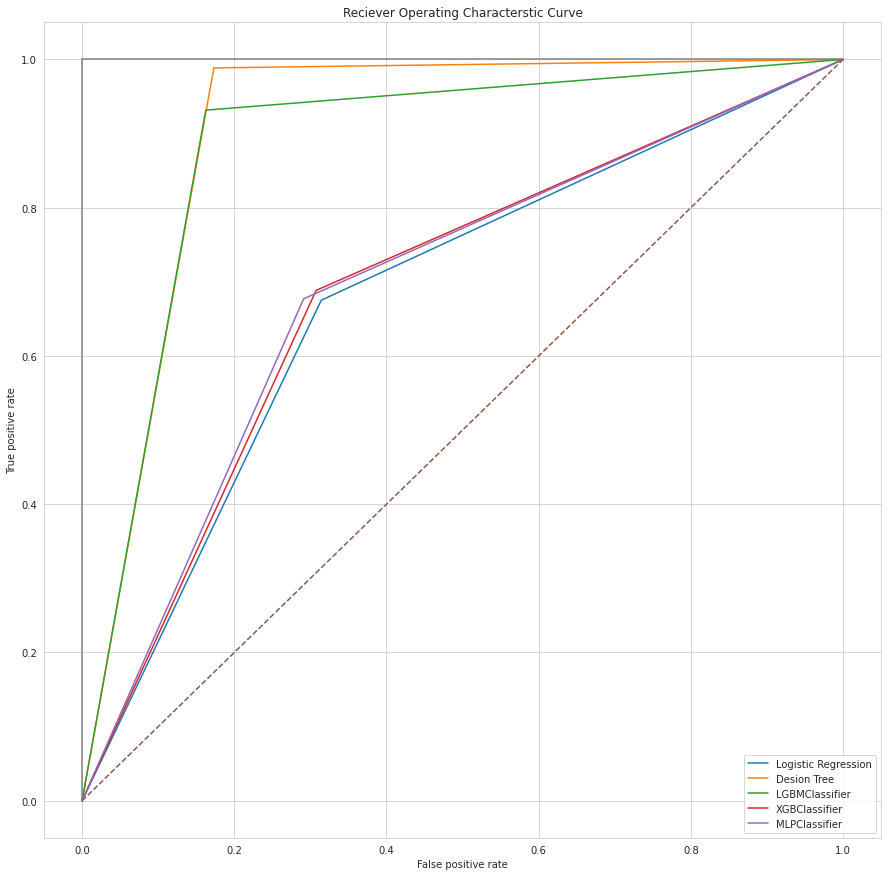

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,15), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(lg_false_positive_rate,lg_true_positive_rate,label='LGBMClassifier')
plt.plot(xg_false_positive_rate,xg_true_positive_rate,label='XGBClassifier')
plt.plot(mlp_false_positive_rate,mlp_true_positive_rate,label='MLPClassifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()